# Pymaceuticals Inc.
---

### Analysis

This was an analysis of data found in a study on mice. I used matplotlib and pandas to visualize the data.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, on=["Mouse ID"], how="left")

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice_id = mouse_study_df['Mouse ID'].unique()
len(mice_id)

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
# https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f

mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep = False), "Mouse ID"].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse = mouse_study_df.loc[mouse_study_df['Mouse ID'] == 'g989', :]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# https://saturncloud.io/blog/how-to-remove-rows-with-specific-values-in-pandas-dataframe/#:~:text=Another%20method%20to%20remove%20rows,value%20we%20want%20to%20remove.
clean_mouse_df = mouse_study_df.drop(mouse_study_df[mouse_study_df['Mouse ID'] == 'g989'].index)
clean_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
new_mice_id = clean_mouse_df['Mouse ID'].unique()
len(new_mice_id)

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of 
# the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Set index as drug regimen to use .groupby and find summary statistics
mice_drugs = clean_mouse_df.set_index("Drug Regimen")
mice_drugs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.0,0,Female,9,22
Ketapril,f932,0,45.0,0,Male,15,29
Ketapril,g107,0,45.0,0,Female,2,29
Ketapril,a457,0,45.0,0,Female,11,30
Ketapril,c819,0,45.0,0,Male,21,25


In [9]:
# Find mean tumor volume with .groupby
mean_volume = mice_drugs.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()

# Find median tumor volume with .groupby
median_volume = mice_drugs.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()

# Find tumor volume variance with .groupby
volume_variance = mice_drugs.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()

# Find tumor volume standard deviation with .groupby
volume_st_dev = mice_drugs.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()

# Find tumor volume standard error with .groupby
volume_sem = mice_drugs.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

In [10]:
# Assemble the resulting series into a single summary DataFrame.
drug_df = pd.DataFrame({"Mean Tumor Volume" : mean_volume,
                        "Median Tumor Volume" : median_volume,
                        "Tumor Volume Variance" : volume_variance,
                        "Tumor Volume Std. Dev." : volume_st_dev,
                        "Tumor Volume Std. Err." : volume_sem})
drug_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

tumor_drug = mice_drugs[["Tumor Volume (mm3)"]]

# Using the aggregation method, produce the same summary statistics in a single line
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html
agg_df = tumor_drug.agg(["mean", "median", "var", "std", "sem"])
agg_df

# could not get this part to work, will try again with tutor in the future

,Tumor Volume (mm3)
mean,50.435293
median,48.933454
var,79.462907
std,8.914197
sem,0.205591


## Bar and Pie Charts

In [12]:
# display dataframe that we are working from
mice_drugs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.0,0,Female,9,22
Ketapril,f932,0,45.0,0,Male,15,29
Ketapril,g107,0,45.0,0,Female,2,29
Ketapril,a457,0,45.0,0,Female,11,30
Ketapril,c819,0,45.0,0,Male,21,25


In [13]:
# find number of rows per drug
# https://stackoverflow.com/questions/45851282/python-pandas-count-number-of-rows-with-certain-index
capomulin_rows = sum(mice_drugs.index == "Capomulin")
ramicane_rows = sum(mice_drugs.index == "Ramicane")
ketapril_rows = sum(mice_drugs.index == "Ketapril")
naftisol_rows = sum(mice_drugs.index == "Naftisol")
zoniferol_rows = sum(mice_drugs.index == "Zoniferol")
stelasyn_rows = sum(mice_drugs.index == "Stelasyn")
placebo_rows = sum(mice_drugs.index == "Placebo")
infubinol_rows = sum(mice_drugs.index == "Infubinol")
ceftamin_rows = sum(mice_drugs.index == "Ceftamin")
propriva_rows = sum(mice_drugs.index == "Propriva")



In [14]:
# make dataframe to plot with pandas
chart_df = pd.DataFrame({"Drug Regimen" : drug_df.index,
                         "Rows" : [capomulin_rows, ramicane_rows, ketapril_rows, naftisol_rows, zoniferol_rows,
                                   stelasyn_rows, placebo_rows, infubinol_rows, ceftamin_rows, propriva_rows]})

# prepare dataframe to be plotted by setting the index to what data will be on the x axis
bar_chart = chart_df.set_index("Drug Regimen")
bar_chart

,Rows
Drug Regimen,
Capomulin,230
Ceftamin,228
Infubinol,188
Ketapril,186
Naftisol,182
Placebo,181
Propriva,181
Ramicane,178
Stelasyn,178


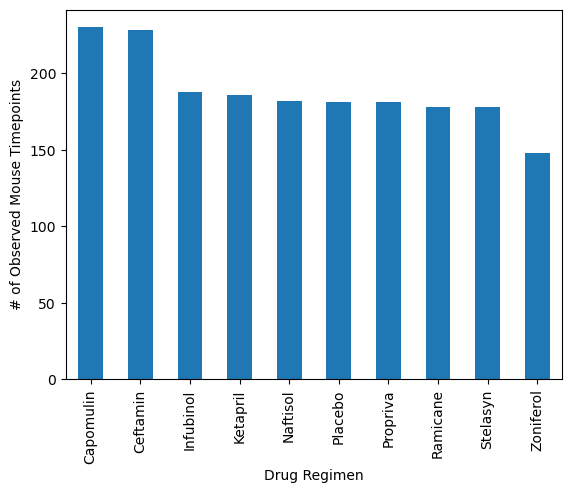

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart.plot(kind="bar", ylabel = "# of Observed Mouse Timepoints", legend=False)
plt.show()

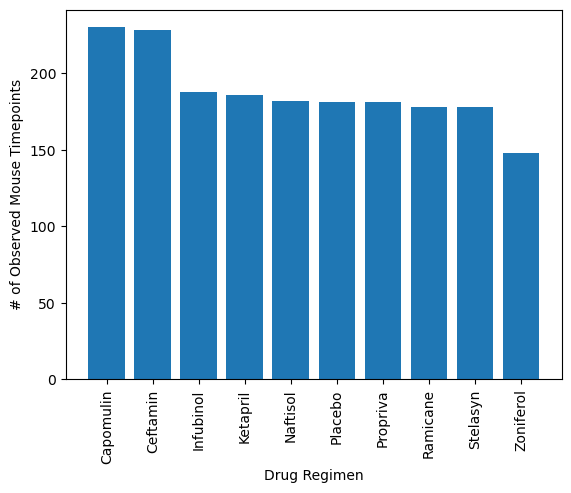

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drug_df.index
timepoints = bar_chart["Rows"]

plt.bar(x_axis, timepoints, align="center")
plt.xticks(rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

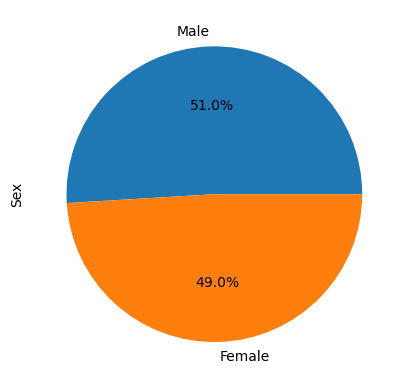

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# https://stackoverflow.com/questions/25805082/unable-to-pie-plot-my-data-in-pandas-python

mice_drugs["Sex"].value_counts().plot(kind='pie', autopct="%1.1f%%")
plt.show()

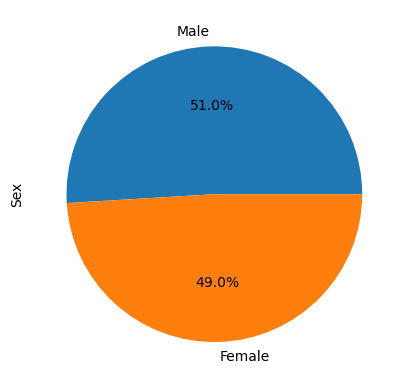

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = mice_drugs["Sex"].value_counts()
labels = ["Male", "Female"]

plt.pie(sex_count, labels = labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = mice_drugs.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [20]:
# reset index after group by function to prepare to merge dataframes
last_timepoint.reset_index()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [21]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
group_df = pd.merge(last_timepoint, clean_mouse_df, on=["Mouse ID", "Timepoint"], how="inner")
group_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    x = group_df.loc[group_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    
    # add subset 
    tumor_data.append(x)
    
    # Determine outliers using upper and lower bounds
    lowerq = np.quantile(x, 0.25)
    upperq = np.quantile(x, 0.75)


    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = []
    
    for value in x:
        
        if value < lower_bound:
            outliers.append(value)
            
        elif value > upper_bound:
            outliers.append(value)
    
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


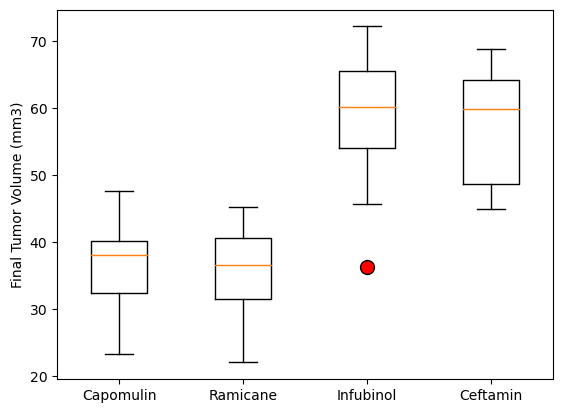

In [30]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# https://stackoverflow.com/questions/65648502/how-to-change-outlier-point-symbol-in-python-matplotlib-pyplot

plt.boxplot(tumor_data, labels=treatments, flierprops={'marker':'o', 'markersize':10, 'markerfacecolor': 'red'})
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [24]:
# find all data for single mouse
single_mouse = clean_mouse_df.loc[clean_mouse_df["Mouse ID"] == "l509", :]
single_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


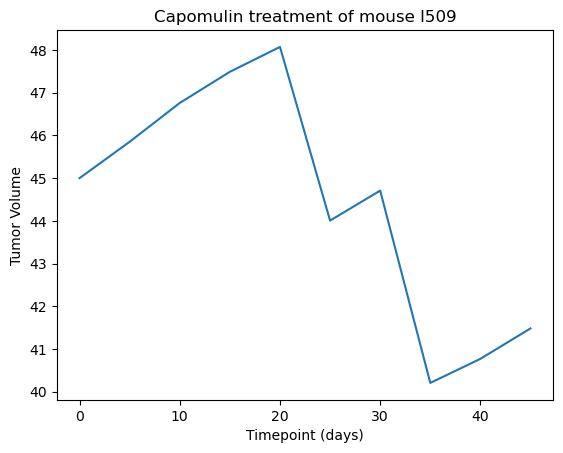

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x_axis = single_mouse["Timepoint"]
volume = single_mouse["Tumor Volume (mm3)"]

plt.plot(x_axis, volume)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume")
plt.title("Capomulin treatment of mouse l509")
plt.show()

In [26]:
# make a new dataframe that only has rows of data where the drug regimen was capomulin
capomulin_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin", :]

# set the index to mouse ID so can use group by and find mean of tumor volume per mouse
cap_df = capomulin_df.set_index("Mouse ID")
mean_vol = cap_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

In [27]:
# find the average mouse weight for each mouse id that will be the same length as the avg tumor volume
mouse_weight = cap_df.groupby(["Mouse ID"])["Weight (g)"].mean()

# merge new data points into new df
plot_df = pd.merge(mean_vol, mouse_weight, on="Mouse ID", how="inner")

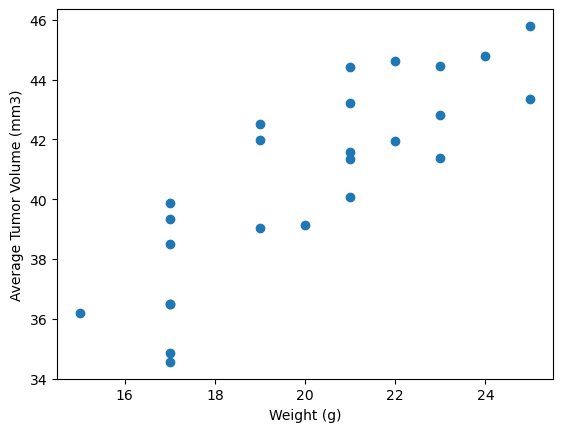

In [31]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight = plot_df["Weight (g)"]
volume = plot_df["Tumor Volume (mm3)"]

plt.scatter(weight, volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


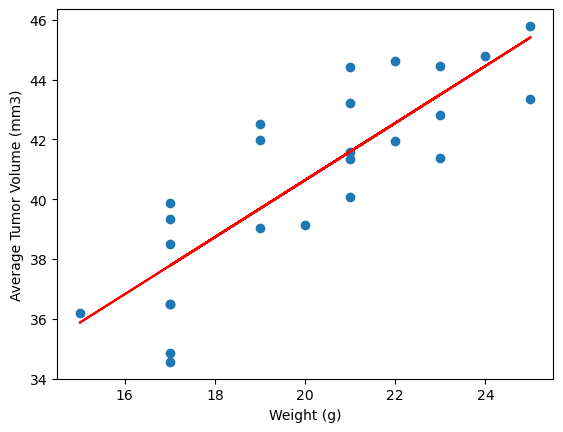

In [29]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = plot_df["Weight (g)"]
volume = plot_df["Tumor Volume (mm3)"]
correlation = st.pearsonr(weight, volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

plt.scatter(weight, volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, volume)
regress_values = weight * slope + intercept
plt.plot(weight, regress_values, "r")

plt.show()